# Figures for CCN 2018 paper

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from PIL.Image import open as open_image
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
import seaborn as sns

In [3]:
from imagery_psychophysics.src.variational import *
from imagery_psychophysics.utils.variational_utils import *

Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
/tmp/try_flags__qebEh.c:4:19: fatal error: cudnn.h: No such file or directory
compilation terminated.

Mapped name None to device cuda: GeForce GTX TITAN X (0000:01:00.0)


In [4]:
from skimage.transform import resize
from os.path import join

In [5]:
experiment_df = open_imagery_probe_data()

In [6]:
experiment_df.head()

,image,image_on,probe,resp_on,response,state,subj
0,candle_01,117.5410,11_12_21,127.8745,3.0,img,AS
1,candle_01,127.9244,15_7_16,139.0581,2.0,img,AS
2,candle_01,139.1078,32_24_33,151.4748,2.0,img,AS
3,candle_01,151.5415,37,156.2748,2.0,img,AS
4,candle_01,156.3414,18_10_19,163.0749,2.0,img,AS


## Retrieve data from training run in analysis_002

In [7]:
store = pd.io.pytables.HDFStore('/home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/analysis/all_subjects.h5','r')

store.keys()

models = store['models']

store.close()

In [10]:
models

,subject,state,target,model
0,AS,pcp,candle_01,<imagery_psychophysics.src.variational.VI obje...
1,AS,pcp,peaches_05,<imagery_psychophysics.src.variational.VI obje...
2,AS,img,candle_01,<imagery_psychophysics.src.variational.VI obje...
3,AS,img,peaches_05,<imagery_psychophysics.src.variational.VI obje...
4,z1,pcp,candle_01,<imagery_psychophysics.src.variational.VI obje...
5,z1,pcp,peaches_05,<imagery_psychophysics.src.variational.VI obje...
6,z1,img,candle_01,<imagery_psychophysics.src.variational.VI obje...
7,z1,img,peaches_05,<imagery_psychophysics.src.variational.VI obje...
8,KL,pcp,candle_01,<imagery_psychophysics.src.variational.VI obje...
9,KL,pcp,cheeseburger_03,<imagery_psychophysics.src.variational.VI obje...


In [9]:
metricsDf = make_new_df('subject+target', models['subject']+models['target'], models)

### Figure 1A/B: Experiment

In [234]:
def load_probe_image(probe_list, shape=None):
    '''
    load_target_image(target_image, shape)
    opens mask image given name (e.g., 'candle_01')
    '''
    drive = '/home/tnaselar/FAST'
    ##base directory
    base = 'imagery_psychophysics/multi_poly_probes'
    probe_place = 'probes'
    image_list = []
    for probe in probe_list:
        thisFile = join(drive, base, probe_place, probe)
#         print 'opening %s' %(thisFile)
        image_array=np.array(open(thisFile,mode='r')) #.convert('L')
        if shape is None:
            image_list.append( image_array )
        else:
            image_list.append( resize(image_array,shape,order=0,preserve_range=True) )
    return image_list

In [232]:
def load_target_image(target_list, shape=None):
    '''
    load_target_image(target_image, shape)
    opens mask image given name (e.g., 'candle_01')
    '''
    drive = '/home/tnaselar/FAST'
    ##base directory
    base = 'imagery_psychophysics/multi_poly_probes'
    probe_place = 'target_images'
    image_list = []
    for probe in target_list:
        thisFile = join(drive, base, probe_place, probe)
#         print 'opening %s' %(thisFile)
        image_array=np.array(open(thisFile,mode='r')) #.convert('L')
        if shape is None:
            image_list.append( image_array )
        else:
            image_list.append( resize(image_array,shape,order=0,preserve_range=True) )
    return image_list

In [12]:
img_probe_list = ['candle_01_letterbox_img_probe(28,37,29).png','candle_01_letterbox_img_probe(22,31,23).png', 'candle_01_letterbox_img_probe(30,39,31,40).png']
pcp_probe_list = ['candle_01_letterbox_pcp_probe(28,37,29).png','candle_01_letterbox_pcp_probe(22,31,23).png', 'candle_01_letterbox_pcp_probe(30,39,31,40).png']
img_probe_images = load_probe_image(img_probe_list)
pcp_probe_images = load_probe_image(pcp_probe_list)

opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/probes/candle_01_letterbox_img_probe(28,37,29).png
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/probes/candle_01_letterbox_img_probe(22,31,23).png
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/probes/candle_01_letterbox_img_probe(30,39,31,40).png
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/probes/candle_01_letterbox_pcp_probe(28,37,29).png
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/probes/candle_01_letterbox_pcp_probe(22,31,23).png
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/probes/candle_01_letterbox_pcp_probe(30,39,31,40).png


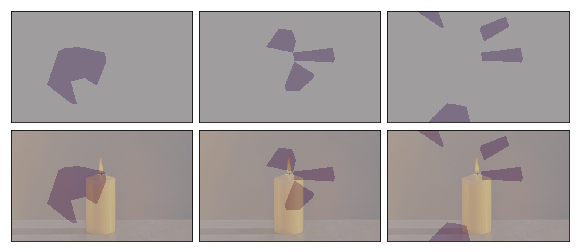

In [269]:
fig = plt.figure(1, (10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

probe_images = img_probe_images+pcp_probe_images
for i in range(6):
    grid[i].imshow(probe_images[i])  # The AxesGrid object work as a list of axes.
    grid[i].set_xticks([])
    grid[i].set_yticks([])


plt.savefig('/home/tnaselar/Dropbox/Presentations/CCN.2018/imagery.probe/experiment.png',bbox_inches='tight',dpi=600)


In [14]:
target_list=['candle_01_letterbox.png', 'grape_juice_02_letterbox.png', 'cheeseburger_03_letterbox.png', 'peaches_05_letterbox.png']
target_images  = load_target_image(target_list)

opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/target_images/candle_01_letterbox.png
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/target_images/grape_juice_02_letterbox.png
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/target_images/cheeseburger_03_letterbox.png
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/target_images/peaches_05_letterbox.png


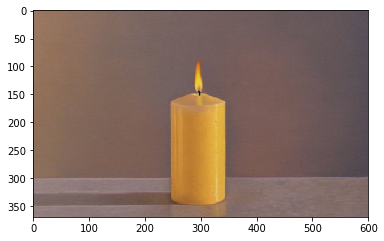

In [15]:
plt.imshow(target_images[0])

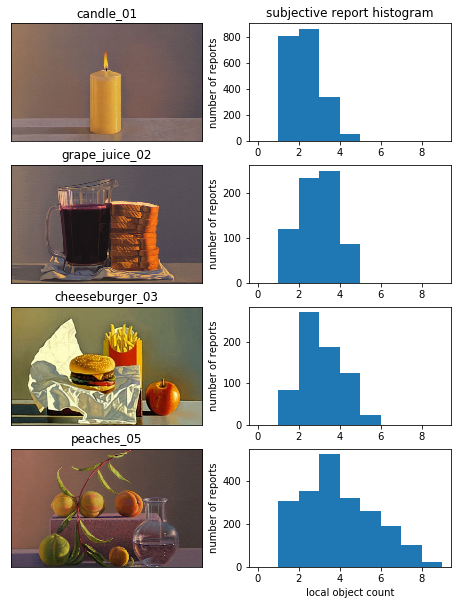

In [270]:
# fig = plt.figure(1, (10., 10.))
# grid = ImageGrid(fig, 111,  # similar to subplot(111)
#                  nrows_ncols=(4, 2),  # creates 2x2 grid of axes
#                  axes_pad=0.1,  # pad between axes in inch.
#                  )

# for i in range(4):
#     grid[2*i].imshow(target_images[i])  # The AxesGrid object work as a list of axes.
#     grid[2*i].set_xticks([])
#     grid[2*i].set_yticks([])
#     grid[2*i+1].hist(x,bins=range(10))

fig = plt.figure(1,figsize=(8., 10.))
grid = lambda x: plt.subplot(4,2,x)
for k in range(4):
    grid(2*k+1).imshow(target_images[k])
    grid(2*k+1).set_xticks([])
    grid(2*k+1).set_yticks([])
    grid(2*k+1).set_title(target_list[k][:-14])
    x = experiment_df[experiment_df['image']==target_list[k][:-14]].response.values
    x = x[~np.isnan(x)]
    grid(2*k+2).hist(x,bins=range(10))
    if k==0:
        grid(2*k+2).set_title('subjective report histogram')    
    grid(2*k+2).set_ylabel('number of reports')
    if k==3:
        grid(2*k+2).set_xlabel('local object count')
    
    
# for i in range(4):
#     grid[i].imshow(target_images[i])  # The AxesGrid object work as a list of axes.
#     grid[i].set_xticks([])
#     grid[i].set_yticks([])    


plt.savefig('/home/tnaselar/Dropbox/Presentations/CCN.2018/imagery.probe/targets.png',bbox_inches='tight',dpi=600)

## Figure 3: Forgetting

In [17]:
nzParams = get_model_attribute('bestNoiseParam', models,shapeOfAttribute=(2,))
metricsDf = make_new_df('forgetting', 1-nzParams[:,0], metricsDf)
metricsDf = make_new_df('halucinating', nzParams[:,1], metricsDf)
metricsDf

,subject,state,target,subject+target,forgetting,halucinating
0,AS,pcp,candle_01,AScandle_01,0.021367,0.021347
1,AS,pcp,peaches_05,ASpeaches_05,0.143571,0.021344
2,AS,img,candle_01,AScandle_01,0.082469,0.021345
3,AS,img,peaches_05,ASpeaches_05,0.530551,0.001000
4,z1,pcp,candle_01,z1candle_01,0.021367,0.021347
5,z1,pcp,peaches_05,z1peaches_05,0.204673,0.021342
6,z1,img,candle_01,z1candle_01,0.306510,0.021338
7,z1,img,peaches_05,z1peaches_05,0.326878,0.001000
8,KL,pcp,candle_01,KLcandle_01,0.001000,0.001000
9,KL,pcp,cheeseburger_03,KLcheeseburger_03,0.021367,0.001000


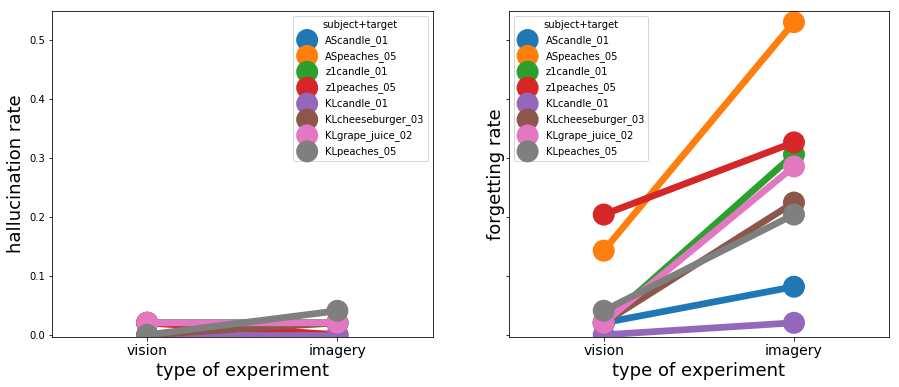

In [289]:
sharedYLim = 0.55
fig = plt.figure(figsize=(15,6))
ax = fig.subplots(nrows=1,ncols=2, sharey=True)
for name,grp in metricsDf.groupby('subject+target'):
    forget = grp.forgetting
    halluc = grp.halucinating
#     ax[0].plot(forget,halluc, 'o-', label=name,markersize=25,alpha=0.8)

# ax[0].plot(np.linspace(0.,sharedYLim),np.linspace(0.,sharedYLim),'k',)
# ax[0].legend(markerscale=.5,loc = 'best',)
# ax[0].set_aspect('equal')
# ax[0].set_ylabel('halucinating probability')
# ax[0].set_xlabel('forgetting probability')

sns.pointplot('state', 'halucinating', data=metricsDf,hue='subject+target',ax=ax[0],aspect=1,scale=2.5)
ax[0].set_ylim(None,sharedYLim)
ax[0].set_ylabel('hallucination rate',{'size':18})
ax[0].set_xticklabels(['vision', 'imagery'],{'size':14})
ax[0].set_xlabel('type of experiment',{'size':18})
sns.pointplot('state', 'forgetting', data=metricsDf,hue='subject+target',ax=ax[1],aspect=1,scale=2.5)
ax[1].set_ylim(None,sharedYLim)
ax[1].set_ylabel('forgetting rate',{'size':18})
ax[1].set_xticklabels(['vision', 'imagery'],{'size':14})
ax[1].set_xlabel('type of experiment',{'size':18})
plt.savefig('/home/tnaselar/Dropbox/Presentations/CCN.2018/imagery.probe/forgetting.png',bbox_inches='tight',dpi=600)

## Figure 4A/B: Reconstructions/Performance

In [19]:
pcpQz = models[models['target']=='candle_01'][models['subject']=='KL'][models['state']=='pcp']['model'].values[0].bestQZ
imgQz = models[models['target']=='candle_01'][models['subject']=='KL'][models['state']=='img']['model'].values[0].bestQZ

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [20]:
candle_img = load_target_image([target_list[0]])

opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/target_images/candle_01_letterbox.png


/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


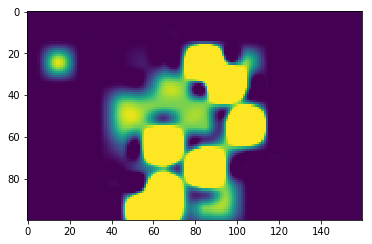

In [21]:
plt.imshow(resize(imgQz[0].reshape((10,16)), (100,160), order=3), vmax=.1)

In [279]:
pdb on

Automatic pdb calling has been turned ON


In [37]:
##model variable parameters
K = 3
D1,D2 = 16,16
dispersion = 2.2
pon,poff = 0.99, .005

##number of objects
nObj = numObjects()
nObj.set_value(K)

##dispersion on category prior
pDisp = priorDispersion()
pDisp.set_value(dispersion)

##resolution of object map Z
nPixels = numPixels()
nPixels.set_value(D1,D2)

##category prior and object map
catProb = categoryProbs(nObj,pDisp)
catProb.set_value(catProb.sample())
Z = latentObjMap(catProb,nPixels)
originalZ = copy.deepcopy(Z)


##noise params: we don't set these because we're going to learn them
nP = noiseParams()


##windows
DPrime1,DPrime2 = 8*D1, 8*D2 ##this gives the "native resolution" of the windows
shape = (DPrime1,DPrime2)
baseShape = (8,8) ##size in pixels of the smallest probes
numScales = 4 ##number of probe sizes between smallest and native resolution
stride = 1 ##how far each probe travels when constructing probes, as a fraction of probe size
numRandProbes = 900 ##number of non-contiguous probes
randProbeOrder = (2, 4) ##non-contig probes will contain this many patches (range of)
windows = probes() ##instantiate a windows object
W = windows.make_windows(shape, baseShape, numScales, stride, numRandProbes, randProbeOrder) ##create the windows

##now, we want to downsample the windows to a more manageable "working" resolution.
##to do this, we first calculate all of the downsamples that have integer dimensions and preserve the aspect ratio
##we set workingScale=n to choose the nth smallest resolution as our working resolution. 
##NOTE: THIS DOESN'T REALLY WORK BECAUSE EACH NATIVE RESOLUTIONI NEEDS TO BE CLEANLY DIVISIBLE BY WORKING RESOLUTION.
##FOR THE "UPSAMPLING" OF Z TO WORK. SO, BEST JUST TO WORK WITH NATIVE RESOLUTIONS THAT ARE POWERS OF SOME NUMBER.
##LIKE, SAY, 2.
#resolutions, workingResolution = windows.resolve(shape, workingScale=-1) 

##Given the above, we'll just set the working resolution by hand
workingResolution = (64,64)

##next, we downsample the windows, and set_value
windows.set_value(windows.reshape(W, workingResolution),flatten=True)

In [38]:
def load_target_mask(target_image, shape=None):
    '''
    load_target_image(target_image, shape)
    opens mask image given name (e.g., 'candle_01')
    '''
    drive = '/home/tnaselar/FAST'
    ##base directory
    base = 'imagery_psychophysics/multi_poly_probes'
    mask_place = 'masks/processed'
    mask_image_file = target_image+'_mask.png'
    thisFile = join(drive, base, mask_place, mask_image_file)
    print 'opening %s' %(thisFile)
    targetObjectMap = np.array(open(thisFile,mode='r').convert('L'))
    if shape is None:
        return targetObjectMap
    else:
        return resize(targetObjectMap,shape,order=0,preserve_range=True)

In [39]:
candle_mask = load_target_mask('candle_01', shape=(D1,D2))

opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/candle_01_mask.png


In [40]:
def convert_object_labels(objectMap):
        nativeLabelList = np.unique(objectMap).tolist()
        K = len(nativeLabelList)
        return np.digitize(objectMap, nativeLabelList,right=True)

In [41]:
candle_mask1hot = convert_object_labels(candle_mask)
candle_mask1hot = to_one_hot_func(candle_mask1hot.astype('int32').flatten(),4).astype('int32')

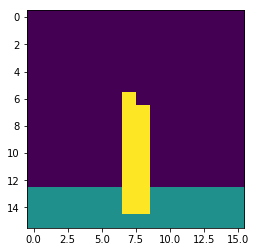

In [42]:
##this gives a 1hot encoding (1, K, D1*D2)
targetZOneHot = make_object_map_stack(K, 2, 3, (D1,D2), 1)
_=Z.view_sample(candle_mask1hot,show=True)


In [43]:
candle_mask1hot.T[np.newaxis,:,:].shape

(1, 4, 256)

In [44]:

##response object
r = responses(Z,nP)
r.set_values(windows=windows)
data = r.sample(candle_mask1hot.T[np.newaxis,:,:],pon,poff)
r.set_values(data=data)

print 'total observations: %d' %(r.N)

total observations: 1196


In [45]:
##instantiate the variational inferences we want to perform
iqZ = inferQZ()
iqPi = inferQPi()

##...and the parameter optimizations (point-estimate) we want
oNP = optimizeNoiseParams()

##variational inference combines them all together
vi = VI(r, iqZ,oNP, iqPi)

### Run variational inference

##inference algorithm parameters
initialNoisinessOfZ = 0.2
pOn_init, pOff_init = .99, 0.0001
densityOfNoiseParamGrid = 50
numStarterMaps = 50
numSamplesForComputingObjectCountProbs = 2
maxNumIterations = 50
trainTestSplit = .9
trainRegSplit = .8
pixelNumOverMin = 2
objectNumOverMin = 2

simualtedModel,_=vi.run_VI(initialNoisinessOfZ, \
                     pOn_init, pOff_init, \
                     densityOfNoiseParamGrid, \
                     numStarterMaps, \
                     numSamplesForComputingObjectCountProbs, \
                     maxNumIterations, \
                     trainTestSplit, trainRegSplit, \
                     optimizeHyperParams=False)

!new best!
ELBO: -2468.567139
goodness of fit: -2575.274902
posterior_entropy: 106.707817
mean log of predictive distribution over test samples: -1.997571
percent correct over test samples: 60.465116


!new best!
ELBO: -356.358917
goodness of fit: -375.117371
posterior_entropy: 18.758463
mean log of predictive distribution over test samples: -0.675866
percent correct over test samples: 77.674419


!new best!
ELBO: -206.840057
goodness of fit: -226.911972
posterior_entropy: 20.071920
mean log of predictive distribution over test samples: -0.290564
percent correct over test samples: 93.488372


ELBO: -180.852875
goodness of fit: -196.876755
posterior_entropy: 16.023888
mean log of predictive distribution over test samples: -0.261984
percent correct over test samples: 93.023256


!new best!
ELBO: -165.746292
goodness of fit: -177.324509
posterior_entropy: 11.578217
mean log of predictive distribution over test samples: -0.240034
percent correct over test samples: 94.418605


!new best!
EL

ELBO: -98.699982
goodness of fit: -100.055702
posterior_entropy: 1.355718
mean log of predictive distribution over test samples: -0.108283
percent correct over test samples: 98.139535


ELBO: -100.082222
goodness of fit: -101.428856
posterior_entropy: 1.346637
mean log of predictive distribution over test samples: -0.108283
percent correct over test samples: 98.139535


ELBO: -100.282867
goodness of fit: -101.631584
posterior_entropy: 1.348714
mean log of predictive distribution over test samples: -0.108283
percent correct over test samples: 98.139535


ELBO: -101.858261
goodness of fit: -103.207466
posterior_entropy: 1.349207
mean log of predictive distribution over test samples: -0.108283
percent correct over test samples: 98.139535


ELBO: -99.038673
goodness of fit: -101.428856
posterior_entropy: 2.390183
mean log of predictive distribution over test samples: -0.108283
percent correct over test samples: 98.139535


ELBO: -100.913589
goodness of fit: -102.802017
posterior_entropy: 1

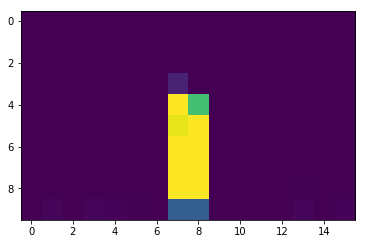

In [48]:
plt.imshow(resize(simualtedModel.bestQZ[2].reshape((D1,D2)), (10,16)))

In [32]:
labels

NameError: name 'labels' is not defined

In [49]:
##pull each model, set current, predict performance to windows, store in a list, add to 
prc_correct = []
for _,dfRows in models.iterrows():
    bestModel = dfRows['model']
    bestModel.update_current(bestModel.testIdx)
    prc_correct += [percent_correct(bestModel)]

    
metricsDf = make_new_df('prediction', prc_correct, metricsDf)    
metricsDf

,subject,state,target,subject+target,forgetting,halucinating,prediction
0,AS,pcp,candle_01,AScandle_01,0.021367,0.021347,88.235294
1,AS,pcp,peaches_05,ASpeaches_05,0.143571,0.021344,72.058824
2,AS,img,candle_01,AScandle_01,0.082469,0.021345,66.176471
3,AS,img,peaches_05,ASpeaches_05,0.530551,0.001000,66.176471
4,z1,pcp,candle_01,z1candle_01,0.021367,0.021347,89.705882
5,z1,pcp,peaches_05,z1peaches_05,0.204673,0.021342,69.117647
6,z1,img,candle_01,z1candle_01,0.306510,0.021338,60.294118
7,z1,img,peaches_05,z1peaches_05,0.326878,0.001000,54.411765
8,KL,pcp,candle_01,KLcandle_01,0.001000,0.001000,100.000000
9,KL,pcp,cheeseburger_03,KLcheeseburger_03,0.021367,0.001000,86.764706


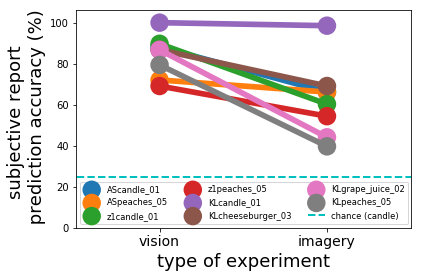

In [272]:
ax = sns.pointplot('state', 'prediction', data=metricsDf,hue='subject+target',aspect=1,scale=2.1)
ax.set_ylim([0,106])
chance_levels = (100./np.array([4, 5, 7,9])).tolist()
# labels = ['candle_01', 'grape_juice_02', 'cheeseburger_03', 'peaches_05']
ax.hlines(chance_levels[0],-1,2,linestyles='--',color='c',linewidth=2.0, label='chance (candle)')
ax.legend(loc='lower left',fontsize='small',ncol=3)
ax.set_ylabel('subjective report \n prediction accuracy (%)', {'size':18})
ax.set_xlabel('type of experiment', {'size':18})
ax.set_xticklabels(['vision', 'imagery'],{'size':14})
plt.savefig('/home/tnaselar/Dropbox/Presentations/CCN.2018/imagery.probe/performance.png',bbox_inches='tight',dpi=600)

In [35]:
candle_img[0]

array([[[149, 115,  94],
        [151, 117,  94],
        [153, 118,  95],
        ...,
        [ 87,  81,  89],
        [ 87,  81,  88],
        [ 86,  80,  88]],

       [[149, 114,  95],
        [150, 115,  94],
        [151, 116,  95],
        ...,
        [ 88,  79,  89],
        [ 88,  80,  88],
        [ 87,  80,  88]],

       [[150, 115,  96],
        [150, 115,  94],
        [151, 116,  94],
        ...,
        [ 90,  80,  89],
        [ 89,  81,  89],
        [ 88,  81,  89]],

       ...,

       [[146, 125, 123],
        [147, 126, 123],
        [149, 126, 124],
        ...,
        [126, 108, 108],
        [126, 108, 107],
        [125, 108, 105]],

       [[147, 125, 126],
        [149, 129, 127],
        [152, 132, 128],
        ...,
        [125, 107, 107],
        [125, 107, 106],
        [125, 108, 105]],

       [[149, 127, 129],
        [152, 132, 130],
        [155, 136, 132],
        ...,
        [125, 107, 107],
        [125, 108, 107],
        [124, 109, 106]]

(100, 160, 3)
(100, 160)
(100, 160)
(100, 160)


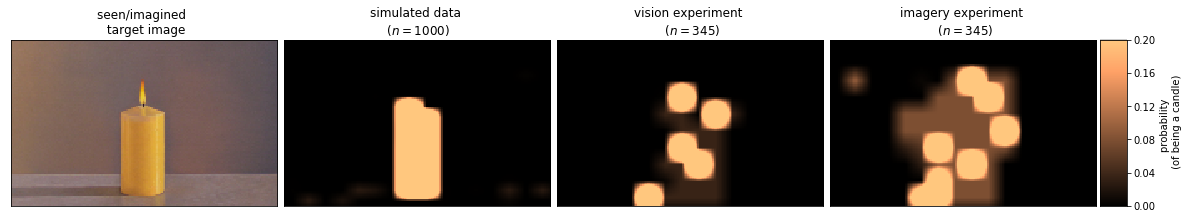

In [288]:
fig = plt.figure(1, (20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 cbar_location="right",
                 cbar_mode="edge",
                 cbar_size="10%",
                 cbar_pad=0.05)
i1,i2 = 100,160
recon_images = [resize(target_images[0], (i1,i2)), resize(simualtedModel.bestQZ[2].reshape((D1,D2)), (i1,i2)), resize(pcpQz[0].reshape((10,16)),(i1,i2)), resize(imgQz[0].reshape((10,16)), (i1,i2))]
labels = ['seen/imagined \n target image',
          'simulated data \n ($n = 1000$)',
          'vision experiment \n ($n=345$)',
          'imagery experiment \n ($n=345$)']
for i in range(4):
    print recon_images[i].shape
    im = recon_images[i]
    pim = grid[i].imshow(im, cmap='copper', vmax=.2,interpolation='None')  # The AxesGrid object work as a list of axes.
    grid[i].set_xticks([])
    grid[i].set_yticks([])
    grid[i].set_title(labels[i])
grid[-2].cax.colorbar(pim)
cax = grid.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text("probability \n (of being a candle)")

plt.savefig('/home/tnaselar/Dropbox/Presentations/CCN.2018/imagery.probe/reconstruction.png',bbox_inches='tight',dpi=600)

## Figure 5: Object size tuning curves

In [69]:
##grab model for one target
#grab the target, make masks of objects, plot each object in a separate frame
##groubpy subject
##for each subject get pcp/img, for each make comem instance
##for each object run size analysis for both pcp/img
##plot the masked object
##underneath, plot tuning functions in same plot with different colors

In [70]:
def split_and_downsample_object_map(target_image_name, shape, show=False):
    targetObjectMap = load_target_mask(target_image_name,shape=None).astype(intX)
    targetObjectMap = np.digitize(targetObjectMap,np.unique(targetObjectMap))-1
    nativeShape = targetObjectMap.shape
    K = len(np.unique(targetObjectMap))
    targetObjectMap1Hot = to_one_hot_func(targetObjectMap.flatten().astype(intX), K).T
    print targetObjectMap1Hot.shape
    masks = np.zeros((K,shape[0],shape[1]))
    for k in range(K):
        mask = targetObjectMap1Hot[k].reshape(nativeShape)
        mask = resize(mask,shape,order=0,preserve_range=True).astype(intX)
        masks[k,:,:] = mask
    
    if show:
        fig = plt.figure(figsize=(20,10))
        for k in range(K):
            plt.subplot(1,K,k+1)
            plt.imshow(masks[k])
    return masks
        


opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/grape_juice_02_mask.png
(5, 222000)


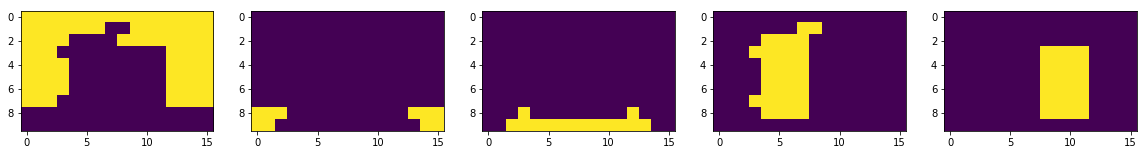

In [71]:
_=split_and_downsample_object_map('grape_juice_02', (10,16),show=True)

In [72]:
def size_tuning(target_image, modelDf, image_shape,figsize=(10,10)):
    masks = split_and_downsample_object_map(target_image, image_shape, show=False)
    targDf = modelDf[modelDf['target']==target_image]
    S = len(targDf['subject'].unique())
    K = masks.shape[0]
    ##set up the plot
    fig = plt.figure(1,figsize=figsize)
    grid = lambda x: plt.subplot(S+1,K,x+1)

    for k in range(K):       
        grid(k).imshow(masks[k])
        grid(k).set_xticks([])
        grid(k).set_yticks([])
        grid(k).set_title('%s|%2d' %(target_image,k))
#         plt.axis('tight')
    s =1
    pcp_prob_list = []
    img_prob_list = []
    size_list = []  
    for name,grp in targDf.groupby(['subject']):
        print name
        pcpComem = comembership_analyzer(grp[grp['state']=='pcp'].model.values[0])
        imgComem = comembership_analyzer(grp[grp['state']=='img'].model.values[0])
        for k in range(pcpComem.K):
            knownPixels = masks[k].flatten().astype('bool')
            knownSize = np.sum(knownPixels)
            if not np.any(knownPixels):
                pcpLogProbs = 0
                imgLogProbs = 0
                sizes=0
            else:
                pcpLogProbs,_= pcpComem.optimize_object_scale(knownPixels)
                imgLogProbs,scaledMasks= imgComem.optimize_object_scale(knownPixels)
                sizes = map(lambda x: np.sum(np.sum(x)), scaledMasks)
            pcp_prob_list.append(pcpLogProbs)
            img_prob_list.append(imgLogProbs)
            size_list.append(sizes)
    return size_list,pcp_prob_list, img_prob_list
#             grid(s*K+k).plot(sizes, pcpLogProbs, '#008080')
#             grid(s*K+k).set_yticks([])
#             imgAx = grid(s*K+k).twinx()
#             imgAx.plot(sizes, imgLogProbs, '#FF7F50')
#             imgAx.set_yticks([])
#             imgAx.axvline(knownSize, linestyle='--',color='k')
#         imgAx.set_ylabel('subject %s \n (log.prob)' %(name))
#         s+=1

##### The candle and the cheeseburger

opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/candle_01_mask.png
(4, 222000)
KL
relaxation fudge factor: 1.000000e-15
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/cheeseburger_03_mask.png
(7, 222000)
KL
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15
relaxation fudge factor: 1.000000e-13
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/peaches_05_mask.png
(9, 222000)
KL
relaxation fudge factor: 1.000000e-13
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15
relaxation fudge factor: 1.000000e-13
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15


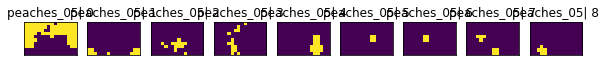

In [74]:
KLmodels = models[models['subject']=='KL']
candle_size_list, candle_pcp, candle_img = size_tuning('candle_01', KLmodels, (10,16))
cb_size_list, cb_pcp, cb_img = size_tuning('cheeseburger_03', KLmodels, (10,16))


opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/peaches_05_mask.png
(9, 222000)
z1
relaxation fudge factor: 1.000000e-13
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15
relaxation fudge factor: 1.000000e-13
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15


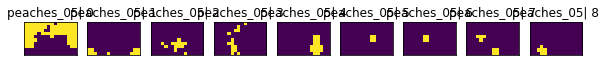

In [119]:
z1models = models[models['subject']=='z1']
z1_peaches_size_list, z1_peaches_pcp, z1_peaches_img = size_tuning('peaches_05', z1models, (10,16))

opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/peaches_05_mask.png
(9, 222000)
AS
relaxation fudge factor: 1.000000e-13
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15
relaxation fudge factor: 1.000000e-13
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15


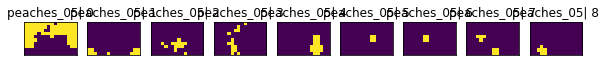

In [117]:
ASmodels = models[models['subject']=='AS']
AS_peaches_size_list, AS_peaches_pcp, AS_peaches_img = size_tuning('peaches_05', ASmodels, (10,16))

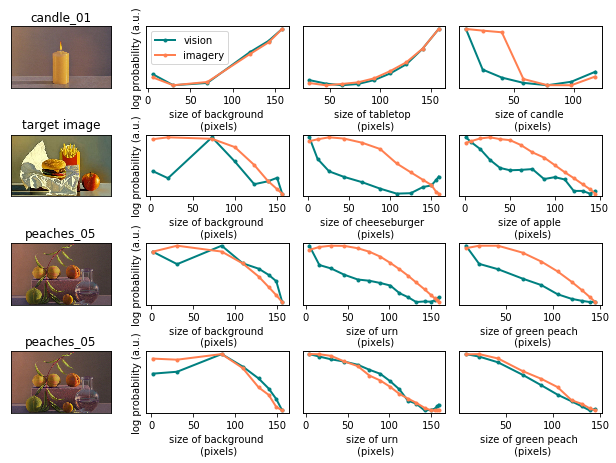

In [268]:
fig = plt.figure(1,figsize=(10., 6.4))
pcpColor = '#008080'
imgColor = '#FF7F50'
lw = 2
grid = lambda x: plt.subplot2grid((4,4),x, fig=fig)
ax00 = grid((0,0))

ax00.imshow(target_images[0])
ax00.set_xticks([])
ax00.set_yticks([])
ax00.set_title(target_list[0][:-14])

ax01 = grid((0,1))
ln1, = ax01.plot(candle_size_list[0], candle_pcp[0], color=pcpColor, linewidth=lw,label='vision',marker='.')
ax01.set_yticks([])
imgAx = ax01.twinx()
ln2,= imgAx.plot(candle_size_list[0], candle_img[0], color=imgColor, linewidth=lw,label='imagery',marker='.')
imgAx.set_yticks([])
ax01.set_xlabel('size of background \n (pixels)')
ax01.legend(loc='upper left', handles=[ln1,ln2])
ax01.set_ylabel('log probability (a.u.)')

ax02 = grid((0,2))
ln1, = ax02.plot(candle_size_list[1], candle_pcp[1], color=pcpColor, linewidth=lw,label='vision',marker='.')
ax02.set_yticks([])
imgAx = ax02.twinx()
ln2,= imgAx.plot(candle_size_list[1], candle_img[1], color=imgColor, linewidth=lw,label='imagery',marker='.')
imgAx.set_yticks([])
ax02.set_xlabel('size of tabletop \n (pixels)')

ax03 = grid((0,3))
stop = -4
ln1, = ax03.plot(candle_size_list[2][:stop], candle_pcp[2][:stop], color=pcpColor, linewidth=lw,label='vision',marker='.')
ax03.set_yticks([])
imgAx = ax03.twinx()
ln2,= imgAx.plot(candle_size_list[2][:stop], candle_img[2][:stop], color=imgColor, linewidth=lw,label='imagery',marker='.')
imgAx.set_yticks([])
ax03.set_xlabel('size of candle \n (pixels)')





ax10 = grid((1,0))
ax10.imshow(target_images[2])
ax10.set_xticks([])
ax10.set_yticks([])
# ax10.set_title(target_list[2][:-14])
ax10.set_title('target image')

ax11 = grid((1,1))
ax11.plot(cb_size_list[0], cb_pcp[0], color=pcpColor, linewidth=lw,marker='.')
ax11.set_yticks([])
imgAx = ax11.twinx()
imgAx.plot(cb_size_list[0], cb_img[0], color=imgColor, linewidth=lw,marker='.')
imgAx.set_yticks([])
ax11.set_ylabel('log probability (a.u.)')
ax11.set_xlabel('size of background \n (pixels)')

ax12 = grid((1,2))
ax12.plot(cb_size_list[5], cb_pcp[5], color=pcpColor, linewidth=lw,marker='.')
ax12.set_yticks([])
imgAx = ax12.twinx()
imgAx.plot(cb_size_list[5], cb_img[5], color=imgColor, linewidth=lw,marker='.')
imgAx.set_yticks([])
ax12.set_xlabel('size of cheeseburger \n (pixels)')

ax13 = grid((1,3))
stop = -4
ax13.plot(cb_size_list[6][:stop], cb_pcp[6][:stop], color=pcpColor, linewidth=lw,marker='.')
ax13.set_yticks([])
imgAx = ax13.twinx()
imgAx.plot(cb_size_list[6][:stop], cb_img[6][:stop], color=imgColor, linewidth=lw,marker='.')
imgAx.set_yticks([])
ax13.set_xlabel('size of apple \n (pixels)')

# -----
ax20 = grid((2,0))
ax20.imshow(target_images[3])
ax20.set_xticks([])
ax20.set_yticks([])
ax20.set_title(target_list[3][:-14])

ax21 = grid((2,1))
ax21.plot(AS_peaches_size_list[0], AS_peaches_pcp[0], color=pcpColor, linewidth=lw,marker='.')
ax21.set_yticks([])
imgAx = ax21.twinx()
imgAx.plot(AS_peaches_size_list[0], AS_peaches_img[0], color=imgColor, linewidth=lw,marker='.')
imgAx.set_yticks([])
ax21.set_ylabel('log probability (a.u.)')
ax21.set_xlabel('size of background \n (pixels)')

ax22 = grid((2,2))
ax22.plot(AS_peaches_size_list[4], AS_peaches_pcp[4], color=pcpColor, linewidth=lw,marker='.')
ax22.set_yticks([])
imgAx = ax22.twinx()
imgAx.plot(AS_peaches_size_list[4], AS_peaches_img[4], color=imgColor, linewidth=lw,marker='.')
imgAx.set_yticks([])
ax22.set_xlabel('size of urn \n (pixels)')

ax23 = grid((2,3))
stop = -4
ax23.plot(AS_peaches_size_list[7][:stop], AS_peaches_pcp[7][:stop], color=pcpColor, linewidth=lw,marker='.')
ax23.set_yticks([])
imgAx = ax23.twinx()
imgAx.plot(AS_peaches_size_list[7][:stop], AS_peaches_img[7][:stop], color=imgColor, linewidth=lw,marker='.')
imgAx.set_yticks([])
ax23.set_xlabel('size of green peach \n (pixels)')

# ---
ax30 = grid((3,0))
ax30.imshow(target_images[3])
ax30.set_xticks([])
ax30.set_yticks([])
ax30.set_title(target_list[3][:-14])

ax31 = grid((3,1))
ax31.plot(z1_peaches_size_list[0], z1_peaches_pcp[0], color=pcpColor, linewidth=lw,marker='.')
ax31.set_yticks([])
imgAx = ax31.twinx()
imgAx.plot(z1_peaches_size_list[0], z1_peaches_img[0], color=imgColor, linewidth=lw,marker='.')
imgAx.set_yticks([])
ax31.set_ylabel('log probability (a.u.)')
ax31.set_xlabel('size of background \n (pixels)')

ax32 = grid((3,2))
ax32.plot(z1_peaches_size_list[4], z1_peaches_pcp[4], color=pcpColor, linewidth=lw,marker='.')
ax32.set_yticks([])
imgAx = ax32.twinx()
imgAx.plot(z1_peaches_size_list[4], z1_peaches_img[4], color=imgColor, linewidth=lw,marker='.')
imgAx.set_yticks([])
ax32.set_xlabel('size of urn \n (pixels)')

ax33 = grid((3,3))
stop = -4
ax33.plot(z1_peaches_size_list[7][:stop], z1_peaches_pcp[7][:stop], color=pcpColor, linewidth=lw,marker='.')
ax33.set_yticks([])
imgAx = ax33.twinx()
imgAx.plot(z1_peaches_size_list[7][:stop], z1_peaches_img[7][:stop], color=imgColor, linewidth=lw,marker='.')
imgAx.set_yticks([])
ax33.set_xlabel('size of green peach \n (pixels)')


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.75,
                    wspace=0.1)

plt.savefig('/home/tnaselar/Dropbox/Presentations/CCN.2018/imagery.probe/tuning.png',bbox_inches='tight',dpi=600)

In [112]:
len(target_images)

4

## Image identification (only in poster)

relaxation fudge factor: 1.000000e-15
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/candle_01_mask.png
after downsampling, number of object in candle_01 is 3
relaxation fudge factor: 1.000000e-13
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/peaches_05_mask.png
after downsampling, number of object in peaches_05 is 9
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/candle_01_mask.png
after downsampling, number of object in candle_01 is 3
relaxation fudge factor: 1.000000e-13
relaxation fudge factor: 1.000000e-14
relaxation fudge factor: 1.000000e-15
opening /home/tnaselar/FAST/imagery_psychophysics/multi_poly_probes/masks/processed/peaches_05_mask.png
after downsampling, number of object in peaches_05 is 9
relaxation fudge facto

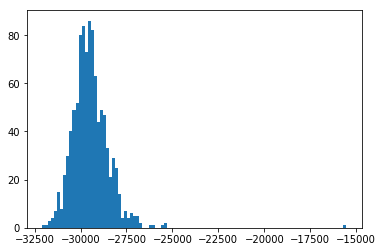

In [64]:
##pull each model, set current, predict performance to windows, store in a list, add to
id_correct = []
for _,dfRows in models.iterrows():
    
    ##get model and create an analyzer
    bestModel = dfRows['model']
    comem=comembership_analyzer(bestModel)
    
    ##grab and process the target image
    target = dfRows['target']
    targetObjectMap = load_target_mask(target,(comem.D1,comem.D2)).astype(intX)
    targetObjectMap = np.digitize(targetObjectMap,np.unique(targetObjectMap))-1
    K = len(np.unique(targetObjectMap))
    print 'after downsampling, number of object in %s is %d' %(target, K)
    targetObjectMap = to_one_hot_func(targetObjectMap.flatten().astype(intX),K)
    targIdx = 1000
    
    ##make lure images
    lureZ = make_object_map_stack(K, np.ceil(np.sqrt(K)*np.sqrt(2)), np.ceil(np.sqrt(K)*np.sqrt(2)), (comem.D1,comem.D2),targIdx+1)
    lureZ[targIdx] = targetObjectMap.T
    logProbs, bestZ = comem.posterior_image_identification(lureZ)
    rank = np.where(np.argsort(logProbs)==targIdx)[0][0]
    id_correct += [rank]
    if rank == 1000:
        saveLogProbs=logProbs
        saveBestZ = bestZ

##check sanity
print 'these two number should be the same:'
print logProbs[targIdx]
print logProbs[np.argsort(logProbs)[rank]]
print '\n'
print 'these should too'
_=plt.hist(saveLogProbs,bins=100)
print saveLogProbs[saveBestZ]
print saveLogProbs[targIdx]

In [65]:
metricsDf = make_new_df('image_id', id_correct, metricsDf)    
metricsDf

,subject,state,target,subject+target,forgetting,halucinating,prediction,image_id
0,AS,pcp,candle_01,AScandle_01,0.021367,0.021347,88.235294,1000
1,AS,pcp,peaches_05,ASpeaches_05,0.143571,0.021344,72.058824,1000
2,AS,img,candle_01,AScandle_01,0.082469,0.021345,66.176471,990
3,AS,img,peaches_05,ASpeaches_05,0.530551,0.001000,66.176471,2
4,z1,pcp,candle_01,z1candle_01,0.021367,0.021347,89.705882,999
5,z1,pcp,peaches_05,z1peaches_05,0.204673,0.021342,69.117647,1000
6,z1,img,candle_01,z1candle_01,0.306510,0.021338,60.294118,1000
7,z1,img,peaches_05,z1peaches_05,0.326878,0.001000,54.411765,1000
8,KL,pcp,candle_01,KLcandle_01,0.001000,0.001000,100.000000,1000
9,KL,pcp,cheeseburger_03,KLcheeseburger_03,0.021367,0.001000,86.764706,1000


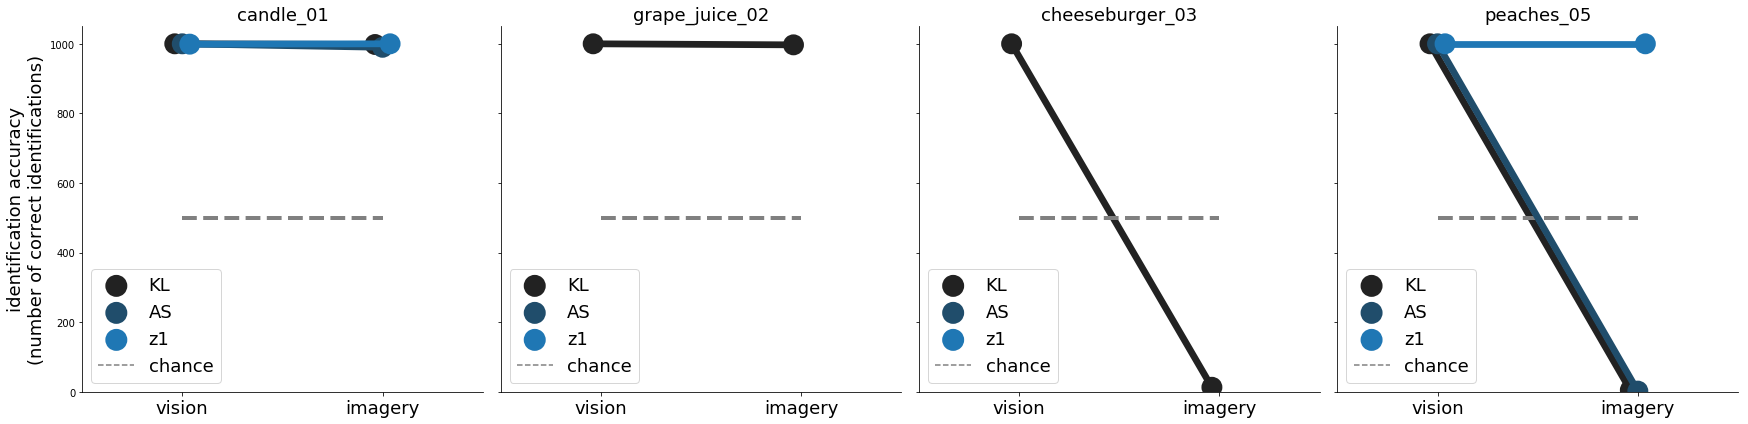

In [267]:

chance_levels = [500]*4
pFG = sns.FacetGrid(metricsDf,size= 6, col='target',ylim=(0,1050),col_order=['candle_01', 'grape_juice_02', 'cheeseburger_03', 'peaches_05'])
pFG.map(sns.pointplot,'state','image_id','subject',hue_order=['KL','AS','z1'],dodge=True, scale=2.5)
pFG.set_titles(col_template="{col_name}", size=18)
pFG.set_ylabels('identification accuracy\n(number of correct identifications)', fontsize=18)
pFG.set_xlabels('')
pFG.set_xticklabels(['vision', 'imagery'],fontsize=18)
for i,ax in enumerate(pFG.axes.flat):
    ax.hlines(chance_levels[i],0,1,linestyles='--',color = [.5, .5, .5],label='chance')
    ax.legend(loc='lower left',fontsize= 18)
    
#     plt.setp(ax.lines, linewidth=8)
#     plt.setp(ax.lines, markersize=8)
    plt.setp(ax.collections, linewidth=4)
plt.savefig('/home/tnaselar/Dropbox/Presentations/CCN.2018/imagery.probe/image_id.png',bbox_inches='tight', dpi=600)

## Raw subject report examples (poster only)

In [217]:
def generate_probe_list(grp, prefix):
    return list(grp.probe.apply(lambda x: x.replace('_', ',')).apply(lambda x: prefix+'('+x+')'+'.png')  )
    

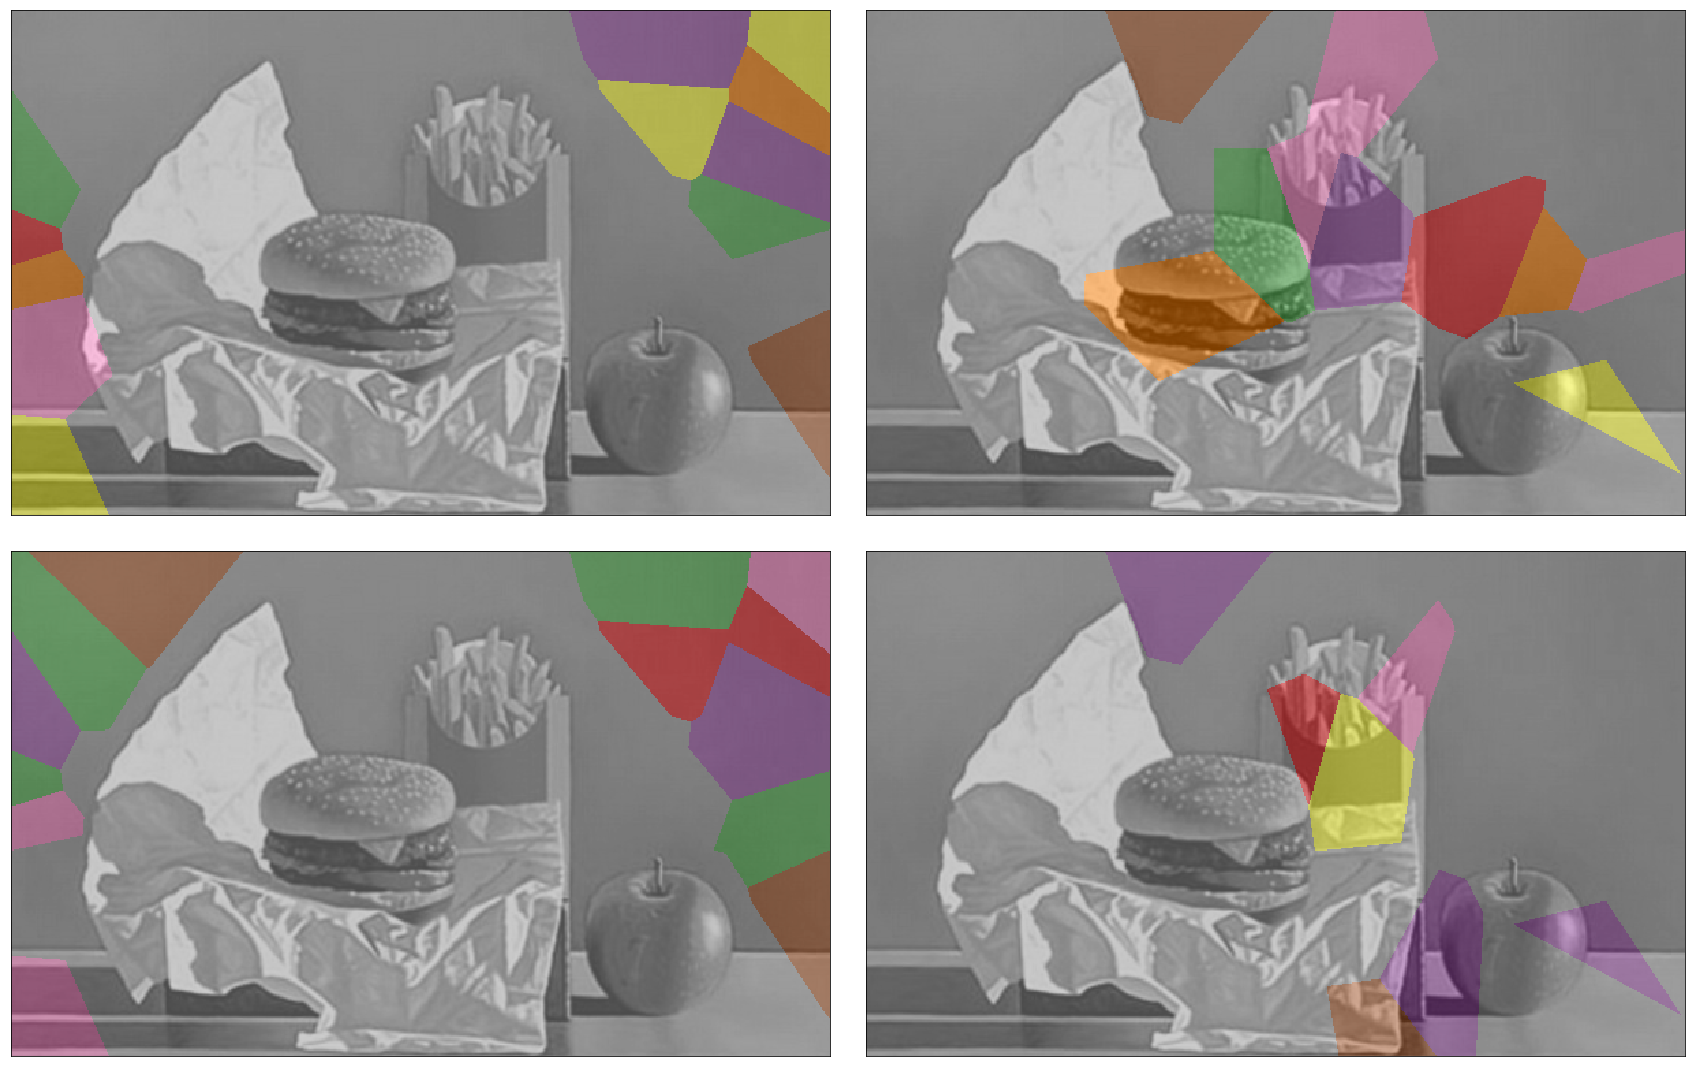

In [274]:
##imagery
fig = plt.figure(1, (30,30))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                nrows_ncols = (2, 2), # creates 2x2 grid of axes
                axes_pad=0.5, # pad between axes in inch.
                )
KL_cheese_img = experiment_df[(experiment_df['subj']=='KL') & (experiment_df['image']=='cheeseburger_03') & (experiment_df['state']=='img')]
cnt = 0
for name,grp in KL_cheese_img.groupby('response'):
    if name in (2,3,4):
#         cnt+=1
        continue
    prblist = generate_probe_list(grp, ('cheeseburger_03_letterbox_img_probe'))
    prbimgs = load_probe_image(prblist)
    grid[cnt].imshow(np.mean(target_images[2], axis=2), cmap='gray')#+foo)
    ax=grid[cnt].imshow(np.squeeze(np.array(prbimgs)[:,:,:,:-1].sum(axis=0).sum(axis=2)).astype('float32'),cmap='Set1', alpha=0.5)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    cnt+=1
    
##pcp

KL_cheese_pcp = experiment_df[(experiment_df['subj']=='KL') & (experiment_df['image']=='cheeseburger_03') & (experiment_df['state']=='pcp')]
for name,grp in KL_cheese_pcp.groupby('response'):
    if name in (2,3,4):
#         cnt+=1
        continue
    prblist = generate_probe_list(grp, ('cheeseburger_03_letterbox_img_probe'))
    prbimgs = load_probe_image(prblist)
    grid[cnt].imshow(np.mean(target_images[2], axis=2),cmap='gray')#+foo)
    ax=grid[cnt].imshow(np.squeeze(np.array(prbimgs)[:,:,:,:-1].sum(axis=0).sum(axis=2)).astype('float32'),cmap='Set1', alpha=0.5)
    ax.axes.set_yticks([])
    ax.axes.set_xticks([])
    cnt+=1    
    

plt.savefig('/home/tnaselar/Dropbox/Presentations/CCN.2018/imagery.probe/subjective_reports.png',bbox_inches='tight',dpi=600)   
